Part 1

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader as api

# Load the Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

# Function to get similar words
def get_similar_words(word):
    try:
        similar_words = word2vec_model.most_similar(word)
        return similar_words
    except KeyError:
        return f"Word '{word}' not in vocabulary."

words = ['happy', 'sad', 'movie', 'actor', 'love']
similar_words_dict = {word: get_similar_words(word) for word in words}

for word, similar_words in similar_words_dict.items():
    print(f"Similar words for '{word}':")
    if isinstance(similar_words, str):
        print(similar_words)
    else:
        for similar_word, score in similar_words:
            print(f"  {similar_word} ({score:.4f})")
    print()


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Similar words for 'happy':
  glad (0.7409)
  pleased (0.6632)
  ecstatic (0.6627)
  overjoyed (0.6599)
  thrilled (0.6514)
  satisfied (0.6438)
  proud (0.6360)
  delighted (0.6272)
  disappointed (0.6270)
  excited (0.6248)

Similar words for 'sad':
  saddening (0.7273)
  Sad (0.6611)
  saddened (0.6604)
  heartbreaking (0.6574)
  disheartening (0.6507)
  Meny_Friedman (0.6487)
  parishioner_Pat_Patello (0.6476)
  saddens_me (0.6407)
  distressing (0.6399)
  reminders_bobbing (0.6358)

Similar words for 'movie':
  film (0.8677)
  movies (0.8013)
  films (0.7363)
  moive (0.6830)
  Movie (0.6694)
  horror_flick (0.6578)
  sequel (0.6578)
  Guy_Ritchie_Revolver (0.6510)
  romantic_comedy (0.6413)
  flick (0.6322)

Similar words for 'actor':
  actress (0.7930)
  Actor (0.7446)
  thesp (0.6955)
  thespian (0.6652)
  actors (0.6520)
  funnyman (0.6352)
  comedian_Dom_DeLuise (0.6245)
  entertainer (0.618

In [ ]:
# Function to test analogies
def test_analogy(word_a, word_b, word_c):
    try:
        result = word2vec_model.most_similar(positive=[word_b, word_c], negative=[word_a])
        return result
    except KeyError as e:
        return str(e)

analogies = [
    ('France', 'Paris', 'Germany'),  # Expecting 'Berlin'
    ('king', 'man', 'queen'),  # Expecting 'woman'
    ('slow', 'fast', 'quick')  # Expecting 'rapid'
]

for a, b, c in analogies:
    result = test_analogy(a, b, c)
    print(f"'{a}' is to '{b}' as '{c}' is to:")
    if isinstance(result, str):
        print(result)
    else:
        for word, score in result:
            print(f"  {word} ({score:.4f})")
    print()


'France' is to 'Paris' as 'Germany' is to:
  Berlin (0.7644)
  Frankfurt (0.7330)
  Dusseldorf (0.7009)
  Munich (0.6774)
  Cologne (0.6470)
  Düsseldorf (0.6400)
  Stuttgart (0.6361)
  Munich_Germany (0.6238)
  Budapest (0.6193)
  Hamburg (0.6169)

'king' is to 'man' as 'queen' is to:
  woman (0.7609)
  girl (0.6140)
  teenage_girl (0.6041)
  teenager (0.5826)
  lady (0.5753)
  boy (0.5078)
  policewoman (0.5067)
  schoolgirl (0.5052)
  blonde (0.4870)
  person (0.4864)

'slow' is to 'fast' as 'quick' is to:
  quickly (0.4697)
  easy (0.4620)
  Quick (0.4400)
  speedy (0.4331)
  swift (0.4237)
  MEDTOX_develops (0.4213)
  instant (0.4159)
  simple (0.3867)
  quicky (0.3855)
  instantly (0.3847)



Part 2

In [ ]:
import pandas as pd
from google.colab import files
df = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
df = pd.read_csv("IMDB Dataset.csv")

In [ ]:
# Display the first few rows
print(df.head())

# Check for null values
print(df.isnull().sum())

# Basic statistics of the reviews
print(df['review'].describe())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
review       0
sentiment    0
dtype: int64
count                                                 50000
unique                                                49582
top       Loved today's show!!! It was a variety and not...
freq                                                      5
Name: review, dtype: object


In [50]:
df.tail()

,review,sentiment,cleaned_review,vector,review_length
49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...,"[0.050735474, -0.004025906, -0.0114816595, 0.1...",1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,"[0.06773834, 0.028293915, 0.036286317, 0.10710...",642
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...,"[0.095330134, 0.019238012, 0.07610893, 0.11544...",1280
49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...,"[0.08095084, 0.044771973, 0.01584371, 0.070320...",1234
49999,No one expects the Star Trek movies to be high...,negative,one expects star trek movie high art fan expec...,"[0.106830426, 0.014795823, -0.011156225, 0.122...",678


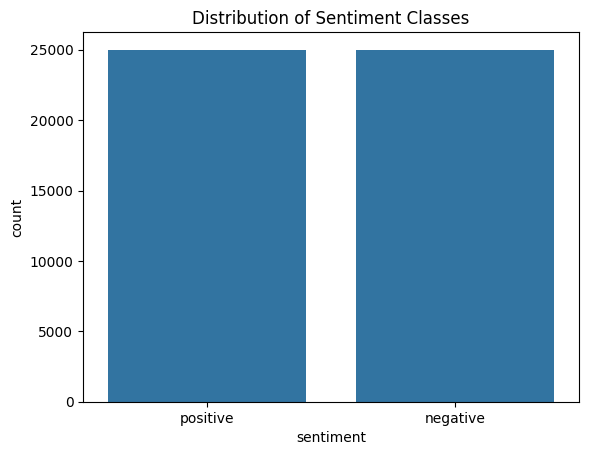

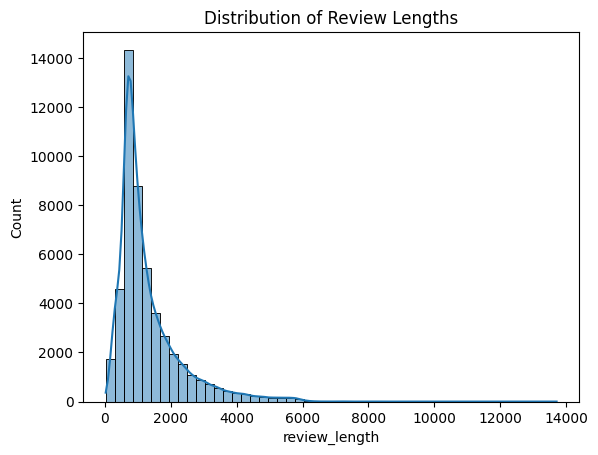

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Classes')
plt.show()

# Display the length of the reviews
df['review_length'] = df['review'].apply(len)
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.show()

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'\b\w+@\w+\.\w+\b', '', text)  # Remove email addresses
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Define stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stop words
    return ' '.join(tokens)

# Clean the reviews
df['cleaned_review'] = df['review'].apply(clean_text)
print(df['cleaned_review'].head())

# Tokenize the cleaned reviews
tokenized_reviews = df['cleaned_review'].apply

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    one reviewer mentioned watching oz episode you...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: cleaned_review, dtype: object


In [36]:
# Tokenize the cleaned reviews
tokenized_reviews = df['cleaned_review'].apply(word_tokenize)


In [37]:
# Train a Word2Vec model using Skip-gram
skipgram_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, sg=1)

# Save the model
skipgram_model.save("skipgram_model.model")

# Example usage of the model
print(skipgram_model.wv.most_similar('movie'))


[('film', 0.9324951171875), ('filmit', 0.9039457440376282), ('moviebut', 0.8917653560638428), ('movieas', 0.8794046640396118), ('gymkata', 0.8792901039123535), ('movieits', 0.8791897296905518), ('movienot', 0.8788661360740662), ('filmbut', 0.8776960372924805), ('filmwhat', 0.8755332827568054), ('filmall', 0.8752758502960205)]


In [38]:
# Train a Word2Vec model using CBoW
cbow_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, sg=0)

# Save the model
cbow_model.save("cbow_model.model")

# Example usage of the model
print(cbow_model.wv.most_similar('movie'))


[('film', 0.8651411533355713), ('flick', 0.690894365310669), ('moviei', 0.6160658001899719), ('moviethe', 0.6008477807044983), ('really', 0.5830879211425781), ('one', 0.5679357647895813), ('guess', 0.5670022368431091), ('however', 0.5655278563499451), ('diekayako', 0.5596083998680115), ('sequel', 0.5492996573448181)]


In [40]:
def document_vector(doc, model):
    doc = [word for word in doc if word in model]
    return np.mean([model[word] for word in doc], axis=0) if len(doc) > 0 else np.zeros(model.vector_size)

# Convert the reviews to vectors using the pretrained model
df['vector'] = df['cleaned_review'].apply(lambda x: document_vector(word_tokenize(x), word2vec_model))


In [42]:
from sklearn.linear_model import LogisticRegression

X = np.vstack(df['vector'].values)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='binary')

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the F1-score
print(f"F1-score (Pretrained Word2Vec): {f1:.4f}")


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

F1-score (Pretrained Word2Vec): 0.8519


In [45]:
def evaluate_model(model, tokenized_reviews, y, model_name):
    X = np.vstack([document_vector(review, model.wv) for review in tokenized_reviews])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='binary')
    print(f"{model_name} F1-score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    return f1

In [48]:
f1_skipgram = evaluate_model(skipgram_model, tokenized_reviews, y, "Skip-gram")
f1_cbow = evaluate_model(cbow_model, tokenized_reviews, y, "CBoW")


Skip-gram F1-score: 0.8758
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.88      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

CBoW F1-score: 0.8575
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



method2

In [49]:
skipgram_model_v2 = Word2Vec(sentences=tokenized_reviews, vector_size=200, window=10, min_count=2, sg=1)

# Train a CBoW model with different hyperparameters
cbow_model_v2 = Word2Vec(sentences=tokenized_reviews, vector_size=200, window=10, min_count=2, sg=0)

# Evaluate the new models
f1_skipgram_v2 = evaluate_model(skipgram_model_v2, tokenized_reviews, y, "Skip-gram v2")
f1_cbow_v2 = evaluate_model(cbow_model_v2, tokenized_reviews, y, "CBoW v2")


Skip-gram v2 F1-score: 0.8847
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

CBoW v2 F1-score: 0.8742
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4961
           1       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

